In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP1000
n=1000

#Fitxer que contè en TPM els gens codifcants excloent els MITOCONDRIALS més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_NOMITO_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000248527,ENSG00000087086,ENSG00000131095,ENSG00000197971,ENSG00000225630,ENSG00000123560,ENSG00000075624,ENSG00000111640,ENSG00000120885,...,ENSG00000105669,ENSG00000183648,ENSG00000100632,ENSG00000183255,ENSG00000135709,ENSG00000184887,ENSG00000130726,ENSG00000183978,ENSG00000165443,ENSG00000141503
0,Brain - Cortex,5852.0,2444.0,993.4,2566.00,1408.0,1436.00,1418.0,1433.0,960.5,...,69.47,49.40,61.97,56.89,108.40,87.44,73.92,82.65,111.60,110.10
1,Brain - Cerebellum,4863.0,1229.0,479.8,102.70,801.8,77.02,1275.0,1306.0,1045.0,...,77.15,68.88,82.24,64.03,189.20,113.80,170.30,79.26,86.75,147.60
2,Brain - Cortex,6309.0,1653.0,842.0,192.80,1281.0,269.60,1109.0,1301.0,1264.0,...,64.55,67.48,60.02,61.39,88.51,88.75,64.12,75.25,86.88,89.59
3,Brain - Cerebellum,5897.0,1082.0,521.1,360.60,969.4,207.40,936.8,890.8,885.3,...,62.59,59.04,73.19,66.30,168.00,109.90,170.00,72.99,56.50,127.60
4,Brain - Cortex,5461.0,1551.0,695.9,215.40,1118.0,432.20,1574.0,1814.0,924.4,...,87.15,94.22,77.55,35.15,116.90,135.10,85.78,102.00,93.54,97.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,6258.0,1646.0,907.6,385.10,943.8,372.80,1401.0,1805.0,1457.0,...,88.82,81.67,62.61,45.52,142.60,101.90,84.27,88.93,90.99,120.90
2637,Brain - Cerebellum,4839.0,1415.0,1328.0,184.80,946.5,166.50,1143.0,1249.0,1883.0,...,77.11,73.19,92.25,77.69,158.50,100.70,152.40,82.80,76.88,148.70
2638,Brain - Cortex,4931.0,2849.0,1268.0,73.87,1225.0,120.40,2797.0,1188.0,1244.0,...,71.57,65.38,81.29,118.00,70.23,87.76,84.70,86.67,64.03,82.09
2639,Brain - Cerebellum,5456.0,894.4,805.0,28.05,1152.0,44.74,1001.0,769.1,1571.0,...,57.79,54.73,75.91,69.50,187.30,100.50,150.10,42.32,66.43,136.20


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

24 components expliquen un 95% de la variança. De 1000 dimensions a 24
The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


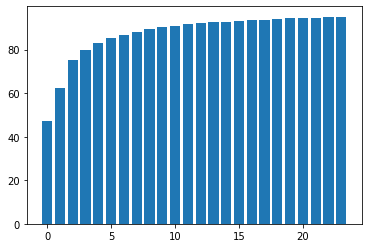

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.492836,-8.717166,-7.882948,-5.099820,-7.589249,-1.816745,-2.909102,-7.334834,3.830060,2.603893,...,0.295116,1.997680,1.409551,0.748581,4.150883,-0.573930,0.836687,-2.269850,0.156161,-0.032543
1,-25.901020,22.718045,-7.703054,4.562839,-1.734607,2.020149,-2.361916,-1.830029,-0.995734,-0.772155,...,-1.598664,-0.576580,0.722349,-2.096662,0.290317,2.098914,1.037734,0.760581,0.903045,-1.551993
2,35.569008,5.663818,-12.091315,-9.072607,3.278382,0.390340,12.250820,6.343926,6.627965,3.938815,...,2.678055,9.621857,-0.449428,-0.126289,-1.262453,-2.173745,-0.516800,0.478613,-2.027788,0.498492
3,56.711274,7.929056,-13.281643,-3.011884,0.314289,-1.315979,0.451378,0.955745,-4.727891,3.854491,...,-1.084153,-1.095007,0.371203,1.753930,-2.695840,2.475801,-1.375395,0.223526,-2.364834,-2.581479
4,19.186902,-2.998826,-8.782465,-5.573626,-5.231694,5.104372,-0.164705,-0.793741,-4.044242,2.222661,...,-2.713192,-2.846204,1.197185,-2.389021,-1.893623,0.189894,0.330358,-1.487920,-1.372485,-0.316508


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,SMTSD
0,5.492836,-8.717166,-7.882948,-5.099820,-7.589249,-1.816745,-2.909102,-7.334834,3.830060,2.603893,...,1.997680,1.409551,0.748581,4.150883,-0.573930,0.836687,-2.269850,0.156161,-0.032543,Brain - Hippocampus
1,-25.901020,22.718045,-7.703054,4.562839,-1.734607,2.020149,-2.361916,-1.830029,-0.995734,-0.772155,...,-0.576580,0.722349,-2.096662,0.290317,2.098914,1.037734,0.760581,0.903045,-1.551993,Brain - Cerebellum
2,35.569008,5.663818,-12.091315,-9.072607,3.278382,0.390340,12.250820,6.343926,6.627965,3.938815,...,9.621857,-0.449428,-0.126289,-1.262453,-2.173745,-0.516800,0.478613,-2.027788,0.498492,Brain - Frontal Cortex (BA9)
3,56.711274,7.929056,-13.281643,-3.011884,0.314289,-1.315979,0.451378,0.955745,-4.727891,3.854491,...,-1.095007,0.371203,1.753930,-2.695840,2.475801,-1.375395,0.223526,-2.364834,-2.581479,Brain - Nucleus accumbens (basal ganglia)
4,19.186902,-2.998826,-8.782465,-5.573626,-5.231694,5.104372,-0.164705,-0.793741,-4.044242,2.222661,...,-2.846204,1.197185,-2.389021,-1.893623,0.189894,0.330358,-1.487920,-1.372485,-0.316508,Brain - Frontal Cortex (BA9)


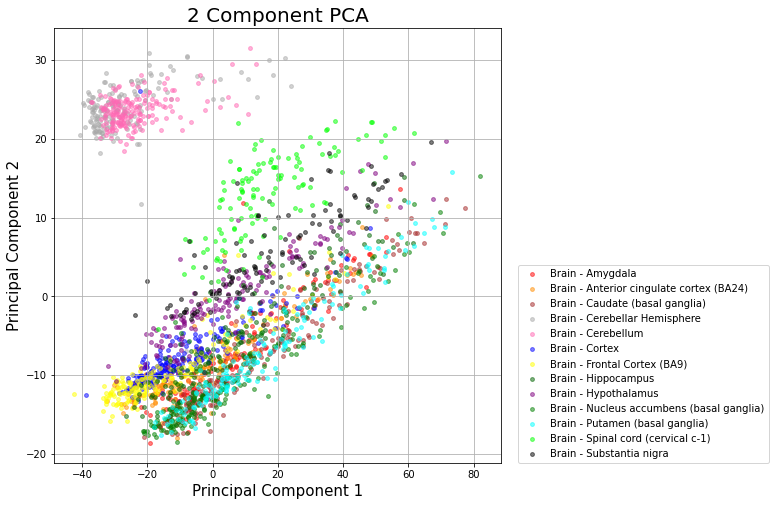

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

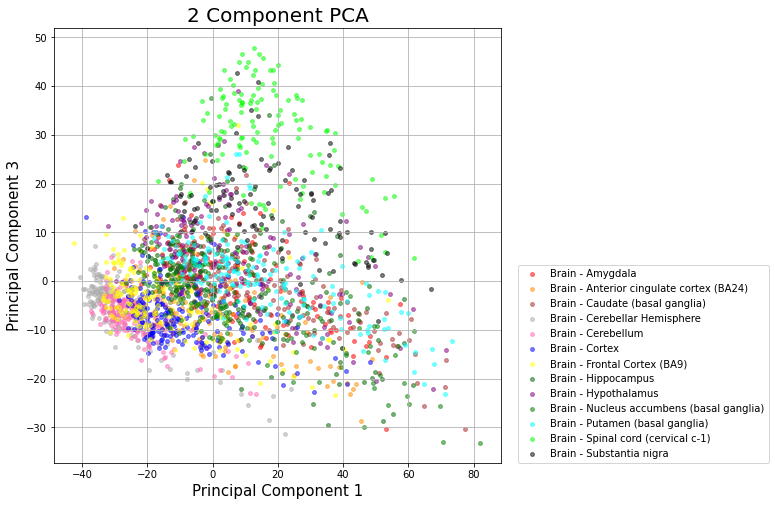

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.002s...
[t-SNE] Computed neighbors for 2112 samples in 0.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 5.648106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.906311
[t-SNE] KL divergence after 1000 iterations: 0.947786


,X,Y,Tipus Teixit
0,-17.214127,1.568015,Brain - Hippocampus
1,18.892029,43.986691,Brain - Cerebellum
2,0.366047,-4.188622,Brain - Frontal Cortex (BA9)
3,10.146741,-0.629427,Brain - Nucleus accumbens (basal ganglia)
4,-8.814905,7.525751,Brain - Frontal Cortex (BA9)


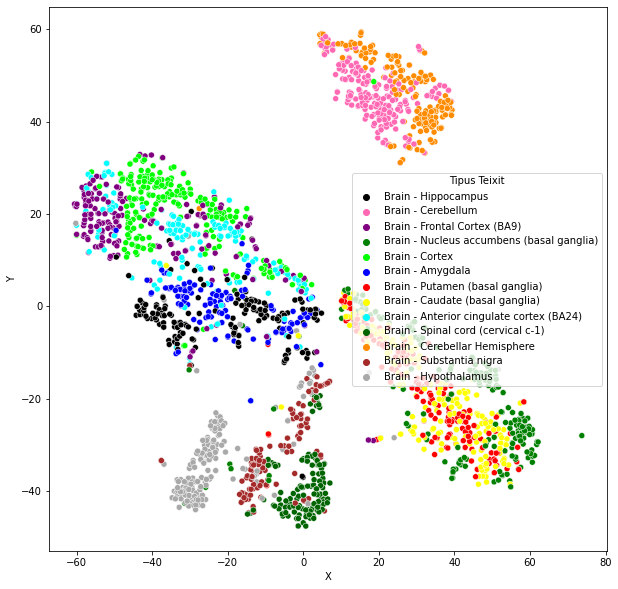

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
24 # Prec. mitjana:  75.9463024233211  desv.:  2.7253071953692087  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
17 # Prec. mitjana:  76.13542877582044  desv.:  2.664606427629056  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
37 # Prec. mitjana:  75.3310828936779  desv.:  2.104587013977682  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
5 # Prec. mitjana:  76.65675579003846  desv.:  2.8312268741453197  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
4 # Prec. mitjana:  76.70459626218367  desv.:  2.702570857806196  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
1 # Prec. mitjana:  77.17785925064831  desv.:  2.7463130483769516  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
11 # Prec. mitjana:  76.4218009478673  desv.:  2.2942040227621607  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
2 # Prec. mitjana:  77.03523204864527  desv.:  2.388033126986136  paràmetres:  {'n_neighb

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,26,0,0,0,0,1,1,6,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,16,0,0,0,1,10,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,37,0,0,0,1,0,0,4,10,0,0
Brain - Cerebellar Hemisphere,0,0,0,46,5,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,4,51,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,41,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),5,2,0,0,0,2,24,0,0,0,0,0,0
Brain - Hippocampus,11,2,0,0,0,0,2,24,1,0,0,0,1
Brain - Hypothalamus,0,0,0,1,0,0,0,0,33,1,0,2,2


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
52 # Prec. mitjana:  27.274657962979525  desv.:  1.6729134299038138  paràmetres:  {'C': 0.01, 'gamma': 0.001}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
61 # Prec. mitjana:  13.210900473933648  desv.:  1.0110167131494667  paràmetres:  {'C': 0.01, 'gamma': 0.005}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,24,0,0,0,0,4,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,47,0,0,0,1,0,0,1,3,0,0
Brain - Cerebellar Hemisphere,0,0,0,51,0,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,1,54,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,40,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,0,32,0,0,0,0,0,0
Brain - Hippocampus,6,3,0,0,0,0,1,30,0,1,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,36,1,0,0,1


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
130 # Prec. mitjana:  52.36698560314764  desv.:  1.4195769590747627  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
132 # Prec. mitjana:  52.27242242689798  desv.:  1.3439239897609643  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
131 # Prec. mitjana:  52.27264598050614  desv.:  1.3194327127679086  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
127 # Prec. mitjana:  52.69829205043368  desv.:  1.6194433842145208  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
129 # Prec. mitjana:  52.60372887418403  desv.:  1.5449162305262953  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
128 # Prec. mitjana:  52.65112223911294  desv.:  1.5659436223516738  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  42.563712778324245  desv.:  3.37085739307422  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  33.664490744880624  desv.:  0.896556888964779

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,25,2,0,0,0,0,2,4,1,0,0,0,0
Brain - Anterior cingulate cortex (BA24),5,11,0,0,0,2,10,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,30,2,0,0,0,0,0,5,14,0,0
Brain - Cerebellar Hemisphere,0,0,0,43,8,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,1,5,48,0,0,0,0,0,1,0,0
Brain - Cortex,1,1,0,0,0,33,5,1,0,0,0,0,1
Brain - Frontal Cortex (BA9),1,3,0,0,0,1,26,1,0,0,0,1,0
Brain - Hippocampus,6,1,0,0,0,2,2,22,2,0,1,1,4
Brain - Hypothalamus,0,0,0,1,0,0,1,0,33,1,0,0,3


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  73.95801663238845  desv.:  1.503312646521949  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  78.4568094429044  desv.:  2.900848718397536  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
52 # Prec. mitjana:  79.26204953947958  desv.:  2.109386089589  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
51 # Prec. mitjana:  79.54484485379594  desv.:  2.6031488696422893  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
50 # Prec. mitjana:  79.63963158365375  desv.:  1.990434806071202  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
53 # Prec. mitjana:  79.26115532504696  desv.:  2.6543796454020376  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
63 # Prec. mitjana:  76.65809711168738  desv.:  2.416313597984764  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
54 # Prec. mitjana:  79.26115532504694  desv.:  2.744498087526676  paràmetres:  {'max_depth': 7, 'n_estimators': 50}

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,28,1,0,0,0,1,0,4,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,20,0,0,0,0,7,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,41,0,0,0,1,0,0,3,7,0,0
Brain - Cerebellar Hemisphere,0,0,0,43,8,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,4,51,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,40,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,3,0,0,0,2,27,0,0,0,1,0,0
Brain - Hippocampus,5,1,1,0,0,0,3,29,0,1,0,1,0
Brain - Hypothalamus,1,0,0,0,0,0,0,0,35,3,0,0,0


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 77.18%
Model kNN, Accuracy de test és: 79.77%
##################################################
Model Svm Accuracy: 89.63%
Model Svm, Accuracy de test és: 92.63%
##################################################
Model Arbre de Decisió: 70.64%
Model Arbre de Decisió, Accuracy de test és: 71.46%
##################################################
Model Random Forest: 83.48%
Model Random Forest, Accuracy de test és: 86.01%
